In [44]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualisations

np.random.seed(29)

#### The numpy.random module provides a number of functions for generating random numbers.

    np.random.choice: selects random options from a list
    np.random.uniform: generates numbers between a given lower and upper bound
    np.random.random: generates numbers between 0 and 1
    np.random.randn: generates numbers from the standard normal distribution
    np.random.normal: generates numbers from a normal distribution with a specified mean and standard deviation
    
28 November 2022


In [34]:
print(np.random.choice(3,2))
print('.')
print(np.random.choice(3,2))
print('.')
print(np.random.uniform(4,3,5))
print('.')
print(np.random.random())
print('.')
print(np.random.randn(9))
print('.')
print(np.random.normal())

[0 2]
.
[2 0]
.
[3.84570725 3.72096707 3.10369156 3.60522442 3.58778438]
.
0.7798688720774692
.
[ 0.23607936 -1.46323913  0.31878989 -2.07011984  0.55816796  0.99987262
  0.43445926  0.53404753 -0.0963585 ]
.
-0.6145392011865335


#### Simulating rolling three six-sided dice

In [116]:
n_trials = nrows = 1_0000
# represents no of trials

n_dice = ncols = 3
# represents number of dice rolled

# using random choice to select from provided-below list.

# we will need n_trials * n_dice

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)

# reshape into rows of 3 columns
rolls

array([[3, 2, 3],
       [5, 5, 3],
       [3, 2, 3],
       ...,
       [3, 2, 2],
       [6, 6, 3],
       [3, 2, 3]])

In [130]:
# computing the sum of each roll (event)

sums_by_trial = rolls.sum(axis = 1)

# return the array of each sum
sums_by_trial


array([ 8, 13,  8, ...,  7, 15,  8])

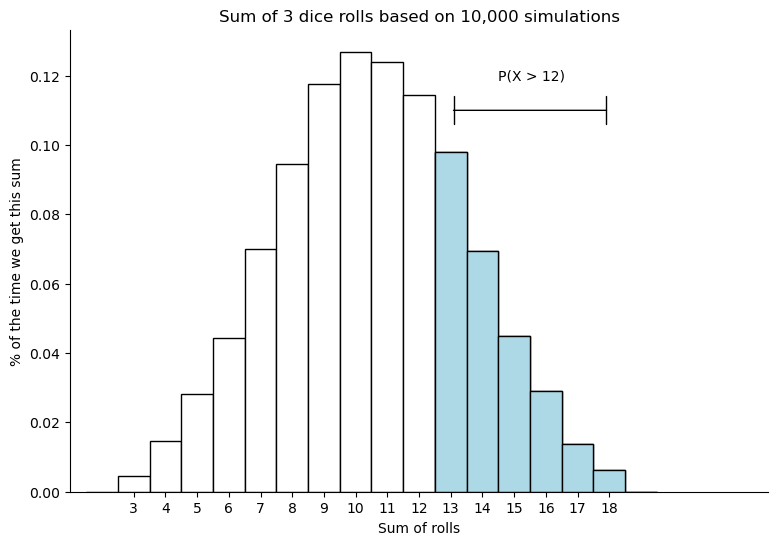

In [118]:
viz.simulation_example1(sums_by_trial)

# displays distribution frequency of the sum of 3 dice being rolled

In [119]:
# find the number of wins
# use a comparison opperator (boolean)

wins = sums_by_trial > 12
wins

array([False,  True, False, ..., False,  True, False])

In [120]:
sum(wins)

2612

In [121]:
# convert boolean True and False to an integer (int)

# take the mean, which is the win rate


win_rate = wins.astype(int).mean()
win_rate

# sum of values (= No of wins, bc win = 1) divided by number of values (total trials) = mean


0.2612

In [124]:
lose_rate = looses.astype(int).mean()
lose_rate

0.6245

In [123]:
# ...

looses = sums_by_trial < 12
looses

array([ True, False,  True, ...,  True, False,  True])

In [104]:
# ...

sum(looses)

6149

In [105]:
# ...

sum(looses) - sum(wins)

3505

In [125]:
.2644 + .6149

0.8793

In [126]:
# cost to play : $ 5 per round

# win (sum greater than 12) = gain $ 15

# profit = winnings - cost to play (ie, $ 10)

# liklihood of winning * Money earned per win in dollars
expected_winnings = win_rate * 15

# fixed cost of $ 5 per game
cost = 5

# subtract cost
expected_profit = expected_winnings - cost

# return expected profit for each game played
expected_profit 

-1.0820000000000003

In [128]:
# Changing the game

# Win is now >= 12

# check the condition
wins = sums_by_trial >= 12

# make the boolean value 0 or 1
win_rate = wins.astype(int).mean()

# amount earned
expected_winnings = win_rate * 15

# fixed cost
cost = 5

# account for the cost
expected_profit = expected_winnings - cost

# return expected profit for each game played
expected_profit


0.6325000000000003

### Toddler takes a nap  

P(nap at weekend) = 0.3  
This is the probability that the toddler takes a nap on _at least_ one day of the weekend.

In [156]:
p_nap = 0.3

# two columns : Sat and Sun
ndays = ncols = 2

# number of trials (ie, weekends trialled) : 100 000.
n_simulated_weekend = nrows = 10 ** 5

In [157]:
data = np.random.random((nrows, ncols))
data

array([[0.11399428, 0.23646351],
       [0.59140559, 0.60139727],
       [0.66800768, 0.56963016],
       ...,
       [0.00094123, 0.70421912],
       [0.42350871, 0.21778958],
       [0.52799175, 0.22790631]])

In [158]:
# how many naps occured, using the generated, random value ?

naps = data < p_nap
naps

array([[ True,  True],
       [False, False],
       [False, False],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

In [159]:
# returns the probability of napping at the weekend

napping = naps.astype(int).mean()
napping

0.29984

In [160]:
print(naps.sum(axis = 1))
print(naps.sum())

[2 0 0 ... 1 1 1]
59968


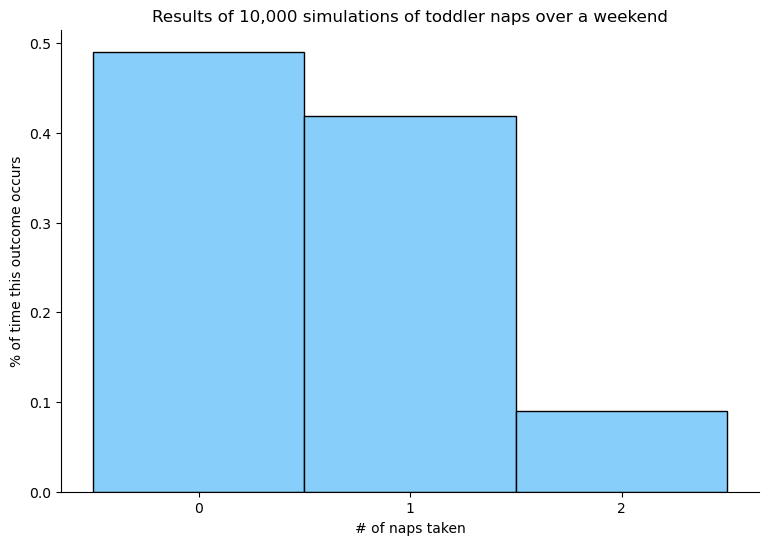

In [161]:
viz.simulation_example2(naps)

In [162]:
# probability of at least 1 nap (ie, 1 nap or 2 naps)

# mean is the total greater than 1 / no of trials

(naps.sum(axis = 1) >= 1).mean()

0.50949

In [166]:
# probability of no naps

(naps.sum(axis = 1) < 1).mean()

# same thing as above
(naps.sum(axis = 1) == 0).mean()

0.49051

<h2 style="background-color:lime  ;">Make a data frame</h1> 

In [176]:
# check if at least one roll is a 3 in each row


n_simulations = nrows = 10 ** 5
n_dice_rolled = ncols = 3

# dice rolls
rolls = np.random.choice([1,2,3,4,5,6], nrows * ncols).reshape(nrows, ncols)


# randomly select from the list above
rolls

# structured as a matrix (dataframe)
#  by using   .reshape(nrows, ncols)



array([[4, 3, 3],
       [5, 1, 5],
       [3, 3, 1],
       ...,
       [2, 2, 2],
       [6, 6, 4],
       [3, 4, 4]])

In [175]:
# lambda function

# checks if a 3 is in a given row 
(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())

# probability of getting a 3 in a set of rolls (row)

0.42213